# Deriving the Equations of Motion of a Simple Spherical Pendulum

We model the spherical simple pendulum as a point mass ($m_P$) attached by a massless, rigid link of length $\ell$ to an inertially fixed point $O$.  The mass is free to move in 3D subject to the constraint of the link length.

<img src="spherical_pendulum.png" width="600"> 

We define an inertial frame $\mathcal{I} = (\mathbf{\hat{e}}_1,\mathbf{\hat{e}}_2,\mathbf{\hat{e}}_3)$ such that $\mathbf{\hat{e}}_3$ points opposite the direction of gravity, and a spherical reference frame $\mathcal{S} = (\mathbf{\hat{e}}_\phi,\mathbf{\hat{e}}_\theta,\mathbf{\hat{e}}_\rho)$ such that $\mathbf{\hat{e}}_\rho$ points from $O$ to $P$ (e.g. $\mathbf{\hat{e}}_\rho \equiv \mathbf{\hat{r}}_{P/O}$). The system's generalized coordinates are $\theta$ (the azimuth angle) and $\phi$ (the zenith angle). The only forces acting on the pendulum mass are gravity and the link constraint force, which we will assume has magnitude $F_C$.

## Define system coordiantes and variables

In [1]:
# load sympy and symphlepers and init printing
from sympyhelpers.sympyhelpers import *
sympy.init_printing()

In [2]:
# generate coordinate variables and diffmap
allsyms, diffmap = gendiffvars([('th','theta'), ('ph', 'phi')])
locals().update(allsyms)
# define strictly positive quantities (link length, mass, and gravitational acceleration)
l,m,g = symbols("\\ell, m_P, g", positive=True)
# define constraint force as strictly real quantity
Fc = symbols("F_C", real=True)

## Define Direction Cosine Matrices and Angular Velocities
Anytime we define a non-inertial frame, we should provide ourselves with DCMs and angular velocities so that we can do any required frame component conversions and differentiations. In this case, the spherical frame is related to the inertial frame via a rotation about $\mathbf{\hat{e}}_3$ by angle $\theta$ followed by a rotation about $\mathbf{\hat{e}}_\theta$ by angle $\phi$.  Both rotations are positive (counter-clockwise) so the total DCM is given by:
$${{\vphantom{C}}^{\mathcal{S}}\!{C}^{\mathcal{I}}} = C_2(\phi)C_3(\theta)$$
Similarly, we can find the net angular velocity of the $\mathcal{S}$ frame in the $\mathcal{I}$ frame by summing the two intermediate angular velocities: 
$$ {{\vphantom{\boldsymbol{\omega}}}^{\mathcal{I}}\!{\boldsymbol{\omega}}^{\mathcal{S}}} = {{\vphantom{\boldsymbol{\omega}}}^{\mathcal{I}}\!{\boldsymbol{\omega}}^{\mathcal{C}}} + {{\vphantom{\boldsymbol{\omega}}}^{\mathcal{C}}\!{\boldsymbol{\omega}}^{\mathcal{S}}} = \dot\theta \mathbf{\hat{e}}_3 + \dot\phi\mathbf{\hat{e}}_\theta$$
where $\mathcal{C}$ is the intermediate Cylindrical frame resulting from the first ($\theta$) rotation. In order to put the final expression entirely in $\mathcal{S}$ frame components, we also need to transform the first angular velocity:
$$[{{\vphantom{\boldsymbol{\omega}}}^{\mathcal{I}}\!{\boldsymbol{\omega}}^{\mathcal{S}}}]_\mathcal{S} = {{\vphantom{C}}^{\mathcal{S}}\!{C}^{\mathcal{I}}}[{{\vphantom{\boldsymbol{\omega}}}^{\mathcal{I}}\!{\boldsymbol{\omega}}^{\mathcal{C}}} ]_\mathcal{I} + [{{\vphantom{\boldsymbol{\omega}}}^{\mathcal{C}}\!{\boldsymbol{\omega}}^{\mathcal{S}}} ]_\mathcal{S}$$

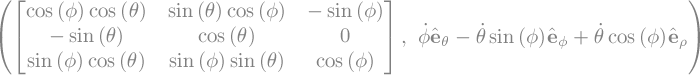

In [3]:
# define spherical frame DCM and angular velocity
# all vectors will be in S frame components
sCi = rotMat(2,ph)*rotMat(3,th)
IwS_S = (sCi*Matrix([0,0,thd])) + Matrix([0,phd,0])
sCi,mat2vec(IwS_S,sphericalframe)

## Kinematics
We define the position vector $\mathbf{r}_{P/O} \triangleq \ell \mathbf{\hat{e}}_\rho$ and differentiate with respect to the inertial frame to find the inertial velocity (in $\mathcal{S}$ frame components.

In [4]:
# position vector
r_PO_S = Matrix([0,0,l])
mat2vec(r_PO_S,sphericalframe)

In [5]:
# velocity vector
v_PO_S = transportEq(r_PO_S, t, diffmap, IwS_S)
mat2vec(v_PO_S,sphericalframe)

## Forces
As per our free body diagram, the only forces acting on the mass are gravity ($-m_Pg\mathbf{\hat{e}}_3$) and the link constraint force ($-F_C \mathbf{\hat{e}}_\rho$). Again, we will express everything in $\mathcal{S}$ frame components.

In [6]:
# force due to gravity
F_g_S = sCi*Matrix([0,0,-m*g])
mat2vec(F_g_S,sphericalframe)

In [7]:
# force due to link constraint
F_C_S = Matrix([0,0,-Fc])
mat2vec(F_C_S,sphericalframe)

## Angular Momentum Balance
We will first find the equations of motion via the angular momentum form of Newton's second law.  This is the most direct approach to getting to the equations of motion using Newtonian formalism, but does not allow us to solve for the link force magnitude.
We find the angular momentum of $P$ about $O$:
$${\vphantom{\mathbf h_{P/O}}}^{\mathcal{I}}\!{\mathbf h_{P/O}} = \mathbf r_{P/O} \times m_P {}^{\mathcal{I}}\!{\mathbf v_{P/O}}$$
differentiate it with respect to the inertial reference frame, and set the solution equal to the net moment on $P$ about $O$:
$$\mathbf{M}_{P/O} = \mathbf r_{P/O} \times \mathbf{F}_P$$

In [8]:
# angular momentum of P about O
h_PO_S = m*r_PO_S.cross(v_PO_S)
mat2vec(h_PO_S, sphericalframe)

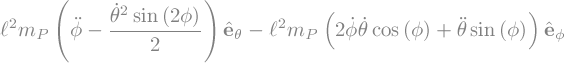

In [9]:
# inertial derivative of angular momentum
dh_PO_S = simplify(transportEq(h_PO_S, t, diffmap, IwS_S))
mat2vec(dh_PO_S, sphericalframe)

In [10]:
# net torque on P aobut O.  Note that adding in the constraint 
# force is unnecessary as it cannot produce a torque about O
# we include it just for completness sake
M_PO_S = r_PO_S.cross(F_g_S+F_C_S)
mat2vec(M_PO_S,sphericalframe)

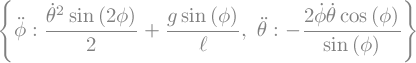

In [11]:
# solve the equations of motion
sol1 = solve(dh_PO_S - M_PO_S, (phdd,thdd))
sol1

## Linear Momentum Balance
We will repeat the derivation using the linear momentum form of Newton's second law.  This requires us to evaluate the inertial acceleration of $P$ with respect to $O$ and then set this (times the mass) equal to the resultant force on $P$.  We can then solve for the equations of motion as well as the magnitude of the link force.

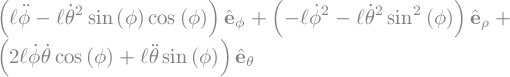

In [12]:
# acceleration vector
a_PO_S = transportEq(v_PO_S, t, diffmap, IwS_S)
mat2vec(a_PO_S,sphericalframe)

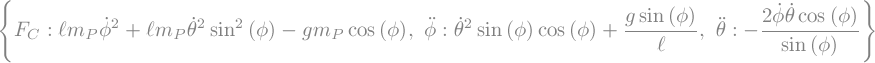

In [13]:
sol2 = solve(m*a_PO_S - (F_g_S+F_C_S), (phdd,thdd, Fc))
sol2

A quick check to ensure that the two solutions match:

In [14]:
simplify(sol1[phdd]- sol2[phdd])

In [15]:
simplify(sol1[thdd]- sol2[thdd])

## Euler-Lagrange Solution
Finally, let's solve for the equations of motion using the Euler-Lagrange equations.  We will need to evaluate the Lagrangian: $L = T-V$ where $T$ is the total kinetic energy of the system and $V$ is the total potential energy.  The kinetic energy is solely due to the particle's velocity, while the potential energy is solely due to gravity.  We define the potential energy zero point such that
$$V = mg\left(\mathbf{r}_{P/O} \cdot \mathbf{\hat{e}}_3\right)$$

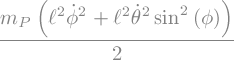

In [16]:
# compute the kinetic energy
T = m/2*(v_PO_S.dot(v_PO_S))
T

In [17]:
# compute the potential energy
V = m*g*(r_PO_S.dot(sCi*Matrix([0,0,1])))
V

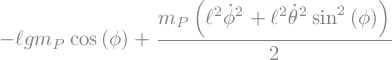

In [18]:
# define Lagrangian
L = T-V
L

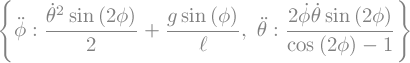

In [19]:
sol3 = EulerLagrange(L, (th,ph), diffmap)
sol3

Again, let's check to make sure our solutions all match:

In [20]:
simplify(sol1[phdd]- sol3[phdd])

In [21]:
simplify(sol1[thdd]- sol3[thdd])